# Blog Post 5: Extending my Titanic Project and comparing Support Vector Machines to Lemons

I wanted to improve the functionality, readability and diversity of algorithms of my Titanic Dataset Project. Honestly, I thought that it was going to be more complicated in terms of just getting the different functions to work in my code, but they all functioned the same way. Of course the attributes and parameters can be adjusted and changed differently but if you just want the models to spit out their predictions, then it was pretty straightforward.

As I explained last week I learned in depth about the Random Forest Classifier function in sklearn (sci-kit learn). I understand better this week what exactly I needed to put in it and why so many blogs I read had their models performing with over 85% accuracy but those same models didn't perform as well when it came to actually submitting their predictions on Kaggle.
Below is my final project, which I would like to come back to maybe 3-4 months from now to see how I could improve it, etc.

Unlike last week, I wanted to import everything I was going to use in one code cell, along with the datasets I used and switch the directory so that I saved everything in the correct place. I'm starting to learn good practices for coding.

In [1]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.read_csv('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Titanic Competition\\titanic (1)\\train.csv', encoding = 'utf8')
df_test = pd.read_csv('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Titanic Competition\\titanic (1)\\test.csv', encoding = 'utf8')
os.chdir('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts')

Then, I looked at the descriptions of both datasets to see what potential problems would arise in cleaning the dataset. I had NaN values in the 'Age', 'Fare', 'Embarked' and 'Cabin' columns. So, I needed to decide what to do about those values.

In [37]:
df_train.info()
display(df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    object  
 9   Alone        891 non-null    object  
 10  person       891 non-null    object  
 11  Fare_Range   876 non-null    category
 12  Age Range    891 non-null    category
dtypes: category(2), float64(2), int64(5), object(4)
memory usage: 78.9+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone,person,Fare_Range,Age Range
0,1,0,3,male,22.0,1,0,7.2500,S,With Family,male,"(0.0, 30.0]","(16.336, 32.252]"
1,2,1,1,female,38.0,1,0,71.2833,C,With Family,female,"(30.0001, 120.0]","(32.252, 48.168]"
2,3,1,3,female,26.0,0,0,7.9250,S,Without Family,female,"(0.0, 30.0]","(16.336, 32.252]"
3,4,1,1,female,35.0,1,0,53.1000,S,With Family,female,"(30.0001, 120.0]","(32.252, 48.168]"
4,5,0,3,male,35.0,0,0,8.0500,S,Without Family,male,"(0.0, 30.0]","(32.252, 48.168]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Without Family,male,"(0.0, 30.0]","(16.336, 32.252]"
887,888,1,1,female,19.0,0,0,30.0000,S,Without Family,female,"(0.0, 30.0]","(16.336, 32.252]"
888,889,0,3,female,28.0,1,2,23.4500,S,With Family,female,"(0.0, 30.0]","(16.336, 32.252]"
889,890,1,1,male,26.0,0,0,30.0000,C,Without Family,male,"(0.0, 30.0]","(16.336, 32.252]"


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df_test.info()
display(df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


For 'Age', I decided to fill the NaN values with the median age. I dropped the 'Cabin' column because there were so many missing values and I didn't think it would be helpful to the analysis. In addition to the 'Cabin' column, I also dropped 'Name' and 'Ticket'. A lot of blogs suggested that special titles in 'Name' such as "Dr.", "Master", "Mr." or "Mrs." could be a good predictor variable but I just didn't think that the juice would be worth the squeeze and might contribute to too many features being considered and overfitting my models.

In [20]:
df_train['Age'] = df_train['Age'].fillna(28.0)
df_test['Age'] = df_test['Age'].fillna(28.0)
# df_train = df_train.drop(columns = ['Cabin','Ticket','Name'])
# df_test = df_test.drop(columns = ['Cabin','Ticket','Name'])

Seeing as there were only 3 missing values for 'Embarked' and 'Fare' put together, I just filled the two missing values for 'Embarked' with 'S' seeing as over 70% of the passengers embarked from Southampton. I filled the one missing value for 'Fare' with 7.0000 because the person was in 3rd class and most of the 3rd class passengers paid about 7.000 for their tickets.

In [12]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_test['Fare'] = df_test['Fare'].fillna(7.0000)

In [21]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    object  
 9   Alone        891 non-null    object  
 10  person       891 non-null    object  
 11  Fare_Range   891 non-null    category
 12  Age Range    891 non-null    category
dtypes: category(2), float64(2), int64(5), object(4)
memory usage: 78.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ---------

Now that all the NaN values were taken care of, I decided to add the 'Alone' column to both datasets. I'm still not sure how to fix the warning I was given for these lines of code. If someone knows how to fix this, please comment for me. I read the documentation but it hasn't quite sunk in yet. I don't believe it affected the data I wanted to get.

In [14]:
df_train['Alone'] = df_train.Parch + df_train.SibSp
df_train['Alone'].loc[df_train['Alone'] > 0] = 'With Family'
df_train['Alone'].loc[df_train['Alone'] == 0] = 'Without Family'

C:\Users\wally\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [15]:
df_test['Alone'] = df_test.Parch + df_test.SibSp
df_test['Alone'].loc[df_test['Alone'] > 0] = 'With Family'
df_test['Alone'].loc[df_test['Alone'] == 0] = 'Without Family'

C:\Users\wally\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Then, I used the function to classify people as "Male", "Female" or "Child" and added it to a 'person' column.

In [17]:
def titan_child(passenger):
    age, sex = passenger
    if age < 14:
        return 'child'
    else: return sex
df_train['person'] = df_train[['Age','Sex']].apply(titan_child, axis = 1)
df_test['person'] = df_test[['Age','Sex']].apply(titan_child, axis = 1)

In [97]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    object  
 9   Alone        891 non-null    object  
 10  person       891 non-null    object  
 11  Fare_Range   876 non-null    category
 12  Age Range    891 non-null    category
 13  Fare Range   891 non-null    category
dtypes: category(3), float64(2), int64(5), object(4)
memory usage: 80.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null

I wanted to split the the Ages and Fares into groups to illustrate a point of likelihood of survival based on what group you were in.

In [28]:
fare_bins = df_train.groupby('Pclass').agg({'Fare': ['min', 'max']})
print(fare_bins) 

       Fare          
        min       max
Pclass               
1       0.0  512.3292
2       0.0   73.5000
3       0.0   69.5500


In [40]:
bins = pd.IntervalIndex.from_tuples([(0, 25.0000), (25.0001, 120.0000), (120.0001, 200.0000),(200.0001, 550.0000)])
df_train['Fare_Range'] = pd.cut(df_train['Fare'], bins)
df_train['Age Range'] = pd.cut(df_train['Age'], 5, duplicates = 'drop')

I thought it would make my project and code much more readable if I grouped similar visualizations together so below I grouped all the visualizations about who was on board the Titanic together. As you can see below, I believe it is much easier to understand the information. You can quickly see that males, third class passengers, people aged 17-32, people without family and Southampton embarkers far outnumbered their respective passenger demographics.

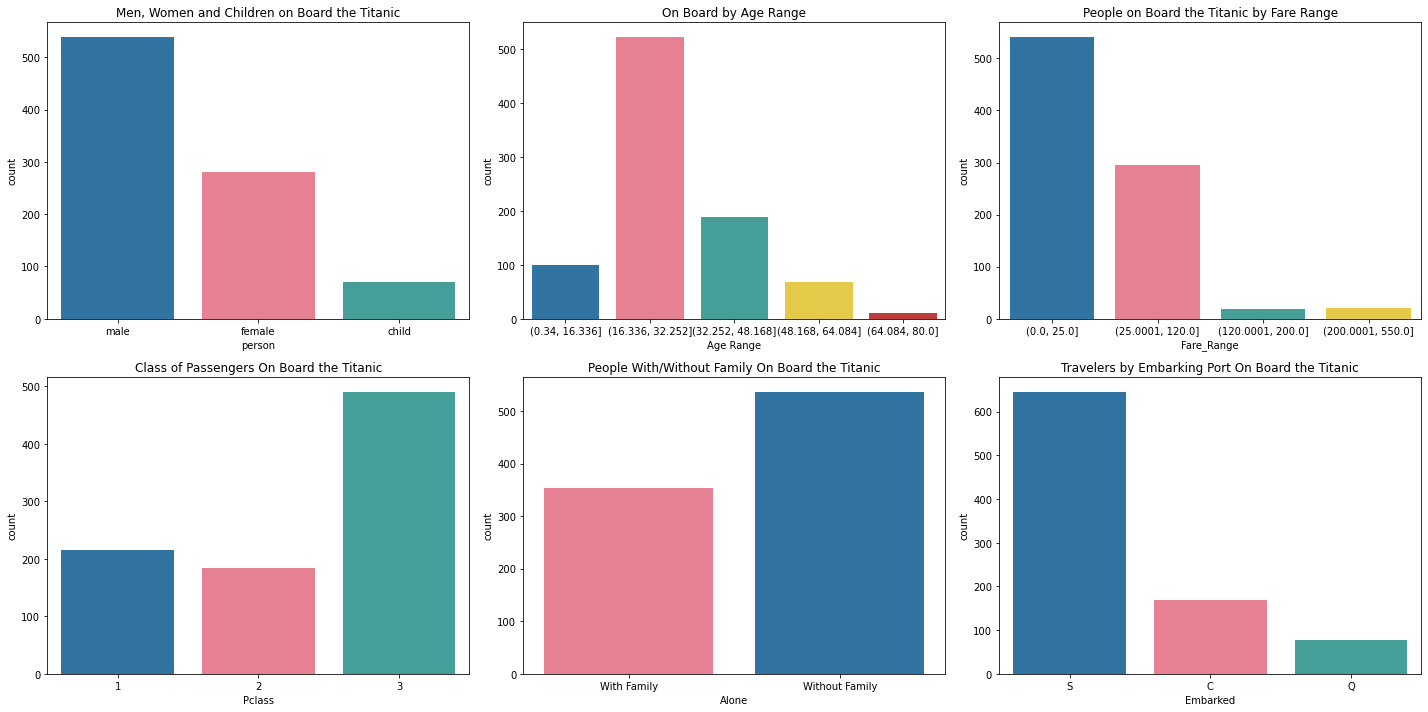

In [49]:
those_colors = sns.color_palette('husl')
these_colors = sns.color_palette()
that_colors = sns.color_palette("Set2")
this_colors = sns.color_palette('pastel')
colors_train = [these_colors[0], those_colors[0], those_colors[3], that_colors[5], these_colors[3]]
color_opp = [those_colors[0], these_colors[0]]
fig, axx = plt.subplots(2,3, figsize = (20,10))
axx[0,0].set_title('Men, Women and Children on Board the Titanic')
sns.countplot(x = 'person', data = df_train, ax = axx[0,0], palette = colors_train)
axx[0,1].set_title('On Board by Age Range')
sns.countplot(x = 'Age Range', data = df_train, ax = axx[0,1], palette = colors_train)
axx[0,2].set_title('People on Board the Titanic by Fare Range')
sns.countplot(x = 'Fare_Range', data = df_train, ax = axx[0,2], palette = colors_train)
axx[1,0].set_title('Class of Passengers On Board the Titanic')
sns.countplot(x = 'Pclass', data = df_train, ax = axx[1,0], palette = colors_train)
axx[1,1].set_title('People With/Without Family On Board the Titanic')
sns.countplot(x = 'Alone', data = df_train, ax = axx[1,1], palette = color_opp)
axx[1,2].set_title('Travelers by Embarking Port On Board the Titanic')
sns.countplot(x = 'Embarked', data = df_train, ax = axx[1,2], palette = colors_train)
plt.tight_layout()

Then I made similar visualizations about the survival of people aboard the titanic. This also is much easier to read and understand. You can see that most people died, you had a much higher chance of survival if you were a woman, a child or had a first class ticket.

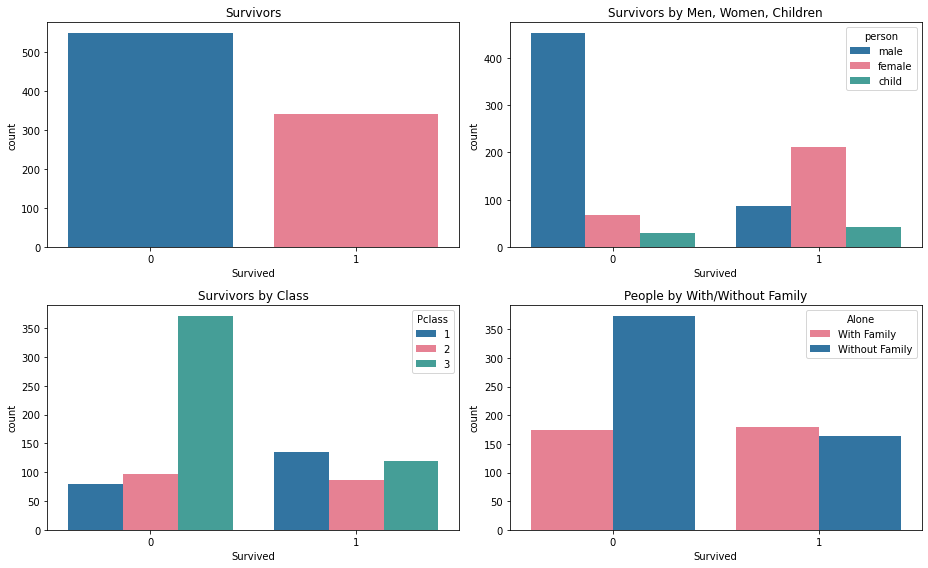

In [64]:
fig, axx = plt.subplots(2,2, figsize = (13,8))
axx[0,0].set_title('Survivors')
sns.countplot(x = 'Survived', data = df_train, ax = axx[0,0], palette = colors_train)
axx[0,1].set_title('Survivors by Men, Women, Children')
sns.countplot(x = 'Survived', hue = 'person', data = df_train, ax = axx[0,1], palette = colors_train)
axx[1,0].set_title('Survivors by Class')
sns.countplot(x = 'Survived', hue = 'Pclass', data = df_train, ax = axx[1,0], palette = colors_train)
axx[1,1].set_title('People by With/Without Family')
sns.countplot(x = 'Survived', hue = 'Alone', data = df_train, ax = axx[1,1], palette = color_opp)
plt.tight_layout()

Then I thought it would be nice to see a heat map of survival by class. It looks nice and it also puts numbers to how many people survived per class. A different visual, a different perspective.

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

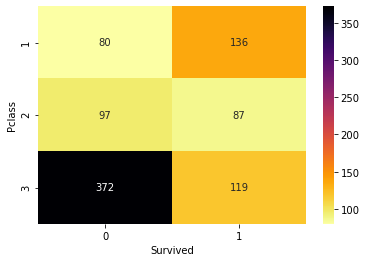

In [85]:
group = df_train.groupby(['Pclass' , 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, cmap = "inferno_r", fmt = 'n')

Then seeing survivors by age range and fare range gives you percentage of survival by that particular group. The higher your fare, the better chance you had of survival. From a strict age perspective, you had a higher chance of survival.

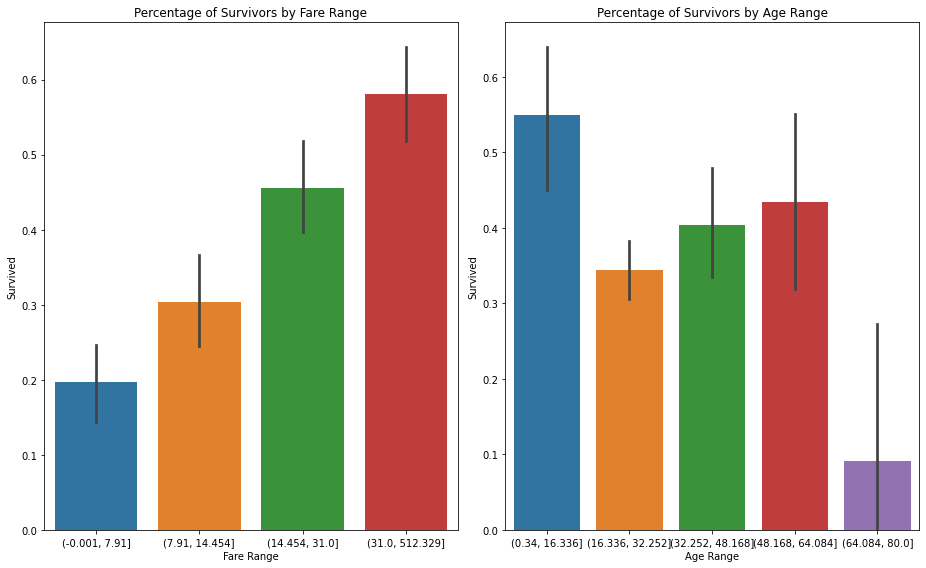

In [96]:
df_train['Fare Range'] = pd.qcut(df_train['Fare'], 4)
fig, axx = plt.subplots(1,2, figsize = (13,8))
axx[0].set_title('Percentage of Survivors by Fare Range')
sns.barplot(x = 'Fare Range', y = 'Survived', data = df_train, ax = axx[0])
axx[1].set_title('Percentage of Survivors by Age Range')
sns.barplot(x = 'Age Range', y = 'Survived', data = df_train, ax = axx[1])
plt.tight_layout()

After I displayed all my visualizations neatly, I went on to my prediction models. I used three different models; Random Forest Classifier, Logistic Regression and Support Vector Classification.

Each of these models works the same way when you use them in Python. However, the way in which they calculate their predictions are different. Last week, I explained how I understood a Random Forest Classification model in this blog post. (https://github.com/wallywanderlust/wallylearnspython/blob/ddd465b881f0fda75f4da51760835156785678ac/Blog%20Post%20Titanic.ipynb)
The Random Forest Classifier got the best score with 0.78708.

In [104]:
features = ['Sex', 'Pclass', 'Age', 'Alone', 'Fare','person']
X = pd.get_dummies(df_train[features])
Y = df_train['Survived']
X_test = pd.get_dummies(df_test[features])
model = RandomForestClassifier(n_estimators = 100, max_depth= 5, random_state=1)
model.fit(X,Y)
predictions = model.predict(X_test)

output = pd.DataFrame({"PassengerId" : df_test.PassengerId, 'Survived' : predictions})
output.to_csv('titanic_submission.csv69', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Here is what I've understood about logistic regression:

There are three types of logistic regression of dependent variables (in our case, who survived on the Titanic because our predictions of who survived or not is _dependent_ on sex, age, passenger class, fare, etc.).

Binary Logistic Regression:
This is our case in the Titanic Dataset. Our dependent variable only has two outcomes; survived or died (0 or 1).

Multinomial Logistic Regression: The dependent variable has
several different outcomes without ordering.
For example, if we replaced 0 and 1 (representing "survived" and "died") in the 'Survived' with categories such as "minor injuries", "major injuries", "loss of limb", "no injuries", "body recovered", "body not recovered", etc.
assuming of course that we had that data. Then we would be
trying to predict the category that each passenger fit into
based on our independent variables.

Ordinal Logistic Regression: The dependent variable has several different outcomes **with** ordering. 
For example, let's say we had the data of doctors who
examined every person/body on the titanic. They rated the
condition of every person/body on a scale of 1-10, 1 being the worst (i.e. body never recovered) and 10 being no injuries at all. This would then have a numerical order and we would be trying to predict what number each person was given based on our independent variables.

Doing more research it becomes clear why we must use Logistic Regression and not Linear Regression. In Linear Regression predictions can range anywhere from negative infinity to positive infinity. This kind of prediction model would be useful if we wanted to predict the profits of a company based on dependent variables such as costs, revenue, employees, etc. We could then only look at the slice of the line for the values that we have. For example, theoretically it is possible to have profits of  100,000,000,000,000,000,000 USD if you have so many employees, costs, revenue etc. but obviously we would only be interested in the part of the graph that has values for our dependent variables.
In our example for the titanic dataset, you can only survive(1) or die(0). You can survive more than someone else (i.e. 1.89 or 543.56) just like you can't die more than someone else (i.e. -1.45 or -2345.56).

Our logistic regression model is an S-shaped curve also known as a sigmoid curve that goes from 0 to 1 but our logistic regression doesn't actually calculate probability. It calculates a continuous survival prediction from 0 to 1(perhaps 0.45, 0.89 or 0.55) and then assigns that number to the actual prediction of being 0 or 1.

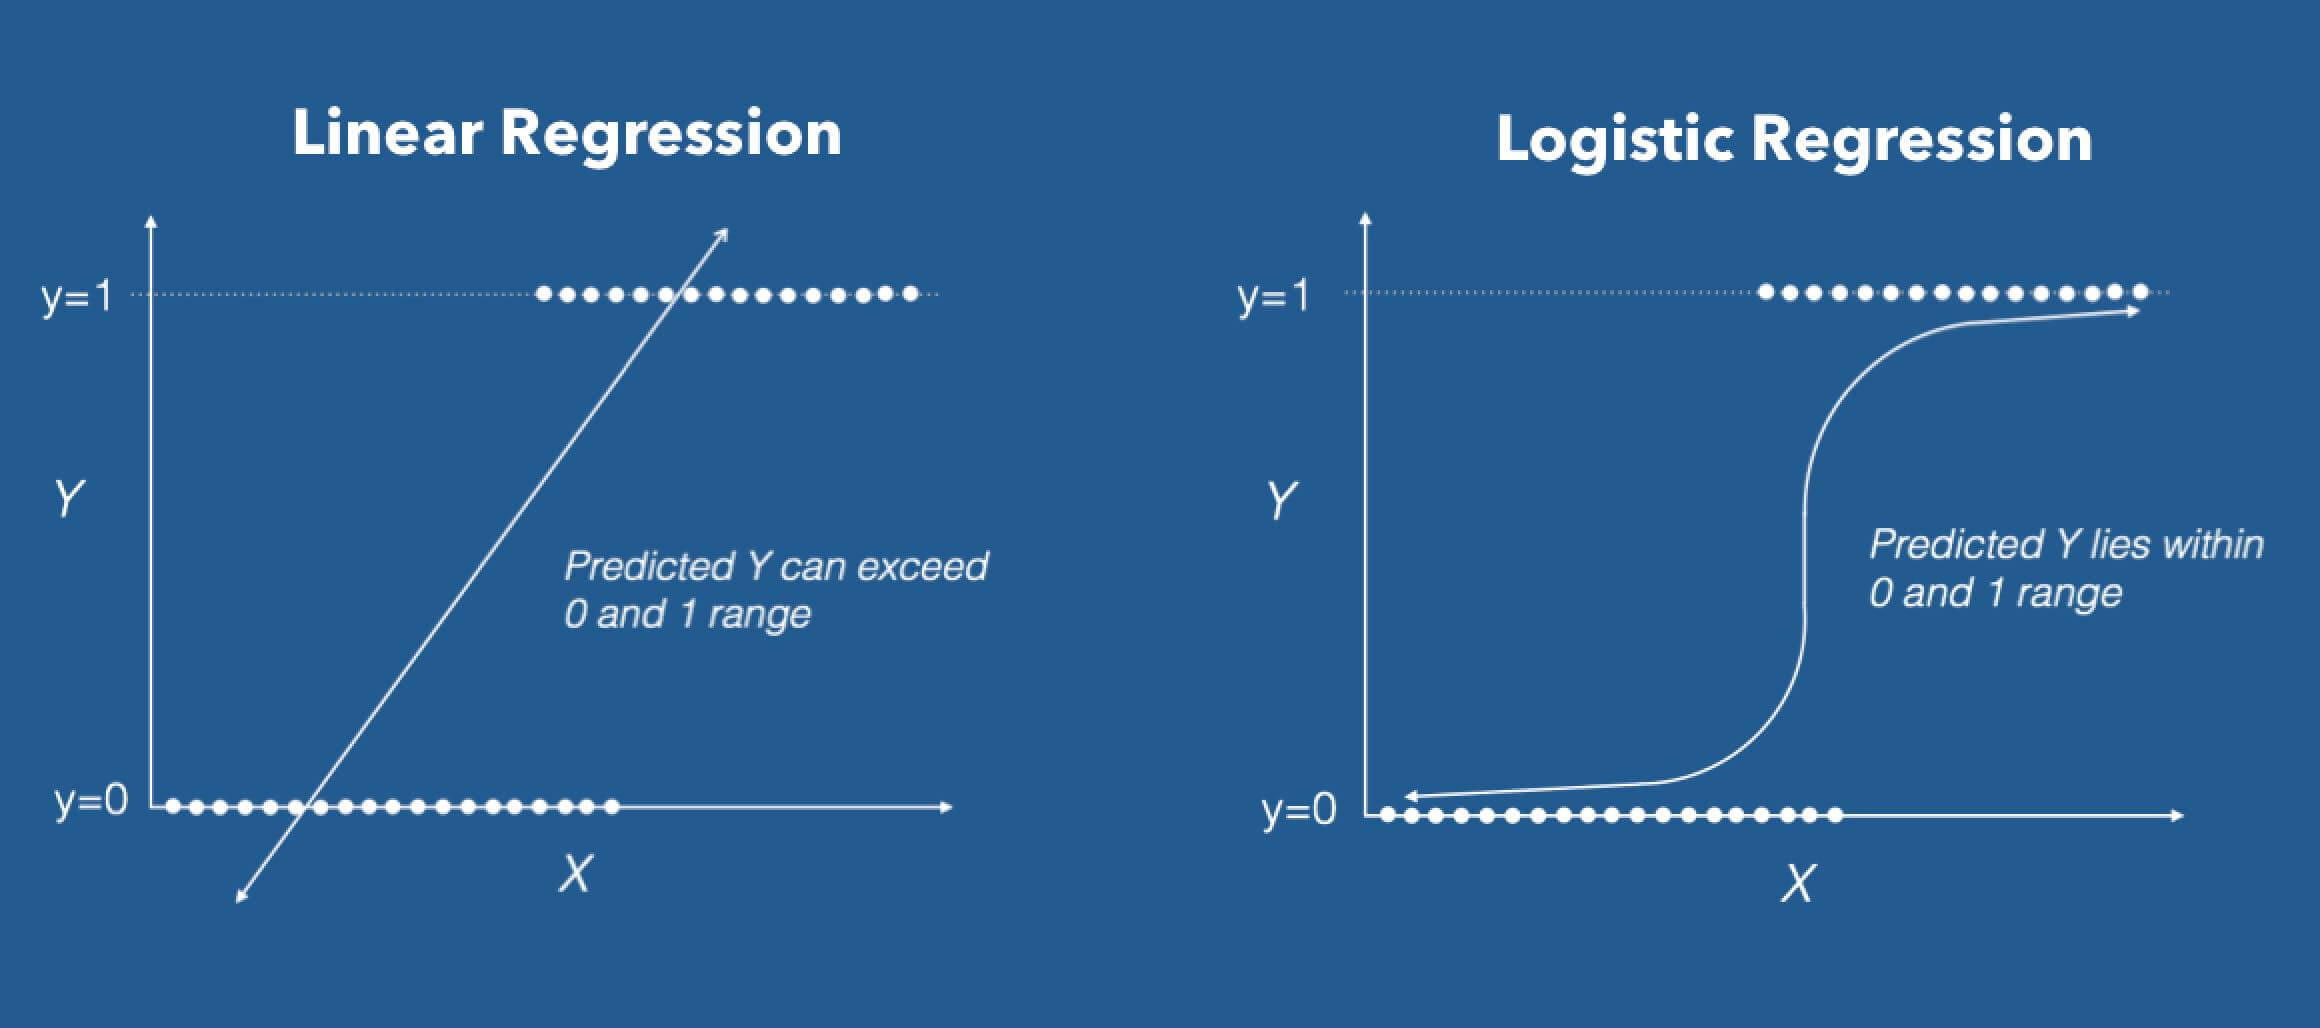

In [116]:
Image('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Titanic Competition\linlog.jpg')

Our logistic regression model calculates a survival prediction based on the values of x that we give it. In our case 'Sex', 'Pclass', 'Age', 'Alone', 'Fare','person'.

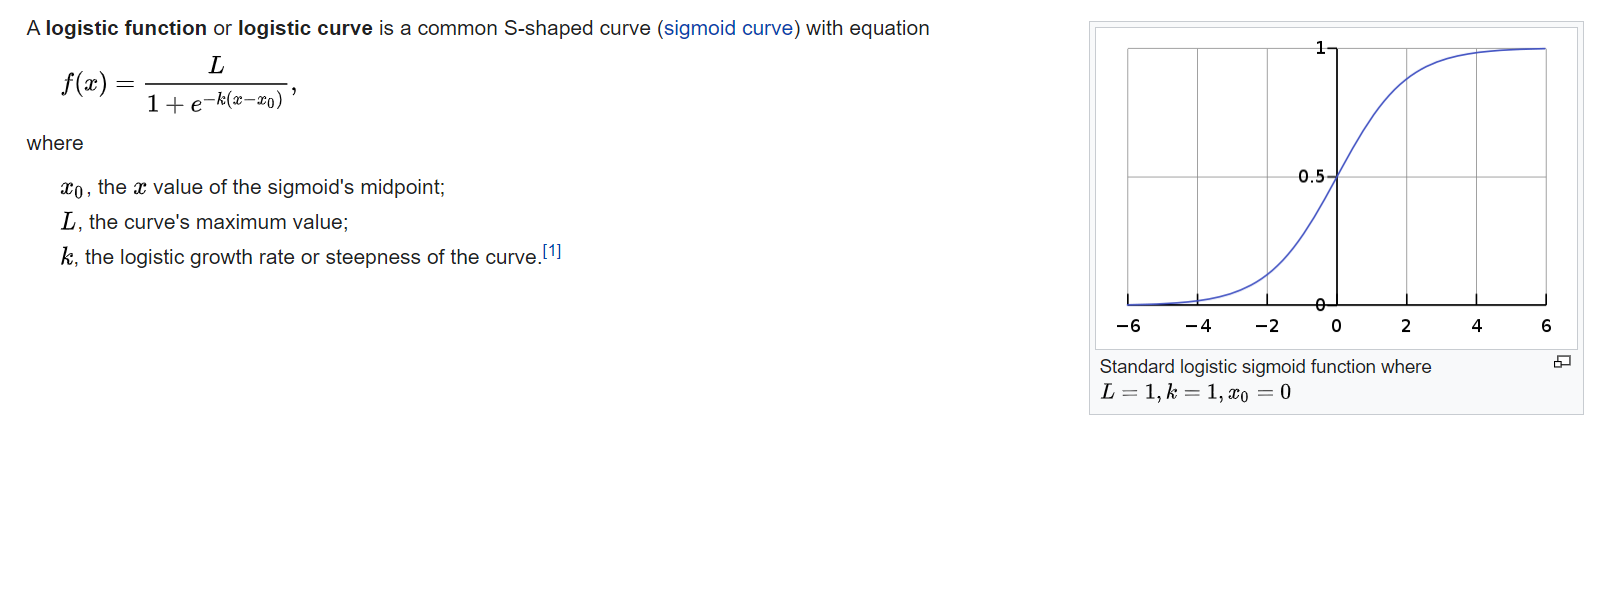

In [114]:
from IPython.display import Image
Image('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Titanic Competition\\logistic function.png')

With all this said, in the actual practice of using Logistic Regression, it didn't do as well as our best Random Forest Classifier. The best score it got from Kaggle was 0.76794. I believe that the model could've done much better had if I had been able to understand the fine tuning that goes into. I went on that wild goose chase for a couple of hours. One of the assumptions of a logistic regression model is that there is no collinearity. In basic terms, it assumes that our independent variables are independent, that one variable doesn't affect the other. In our case there are some variables that were included in the Random Forest Classifier model that probably do have some collinearity. For example, 'Pclass' to a degree does affect 'Fare'. The higher your fare, most likely the higher class you would have. Also for 'person' and 'Sex' and 'Alone' there's definitely some collinearity because I wrote the function that added values to 'person' basically so that the only new information was "child" and for all people labeled as "child" we can mostly assume that they weren't "without family". So for the Logistic Regression model I only used variables that I was sure had no collinearity. Unfortunately, this did not help my model. The updated performance that Kaggle gave me was 0.75837. At the very least, I went to the lengths necessary to do some investigative digging. I believe in the future I will understand how to better adjust regression models.

In [129]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
lr_features = ['Sex', 'Fare','Age','Alone']
lr_X = pd.get_dummies(df_train[lr_features])
lr_Y = df_train['Survived']
lr_X_test = pd.get_dummies(df_test[lr_features])
lr_model = LogisticRegression(max_iter = 200)
lr_model.fit(lr_X,lr_Y)
lr_predictions = lr_model.predict(lr_X_test)

output = pd.DataFrame({"PassengerId" : df_test.PassengerId, 'Survived' : lr_predictions})
output.to_csv('titanic_submission.csvlr_69', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [128]:
import sys
sys.path.append('C:\\users\\wally\\appdata\\local\\programs\\python\\python39\\lib\\site-packages')
import researchpy as rp
import statsmodels.api as sm
train_df_sum = rp.summary_cont(X)
print(train_df_sum)




               Variable      N     Mean       SD      SE  95% Conf.  Interval
0                Pclass  891.0   2.3086   0.8361  0.0280     2.2537    2.3636
1                   Age  891.0  29.3616  13.0197  0.4362    28.5055   30.2176
2                  Fare  891.0  32.2042  49.6934  1.6648    28.9368   35.4716
3            Sex_female  891.0   0.3524   0.4780  0.0160     0.3210    0.3838
4              Sex_male  891.0   0.6476   0.4780  0.0160     0.6162    0.6790
5     Alone_With Family  891.0   0.3973   0.4896  0.0164     0.3651    0.4295
6  Alone_Without Family  891.0   0.6027   0.4896  0.0164     0.5705    0.6349
7          person_child  891.0   0.0797   0.2710  0.0091     0.0619    0.0975
8         person_female  891.0   0.3143   0.4645  0.0156     0.2837    0.3448
9           person_male  891.0   0.6061   0.4889  0.0164     0.5739    0.6382


My final machine learning algorithm was a Support Vector Classification. This seemed to be the most complicated machine learning algorithm out of the three learing algorithms. I couldn't find an explanation of how it actually applies to the Titanic Learning dataset even though I saw a lot of blogs that used this learning algorithms. Nearly all the blogs that tried to explain a real world example, used a collection of two things. So, I will try and explain it in a similar manner but slightly varied.

Imagine that you have a bag of lemons. From the outside all the lemons look the same. Your goal is to sort the lemons that are rotten on the inside from the ones that are ripe on the inside without looking at them but using a Support Vector Classification algorithm. Imagine that when you lay out all the lemons on a table, they are all mixed in with each other. There is no line that you could draw between the rotten lemons and the ripe lemons that would separate them. However, what if you were able to put all those lemons in the same exact order they were laid out on the table into a large pool. The rotten lemons float slightly higher than the ripe lemons. The water in this case is part of your formula that determines this difference in elevation in the water. The water in our case represents the independent variables and can do some deciding for us. It also helps that the lemons are now in a three dimensional space, therefore we are not limited to drawing a line to seperate the lemons. In the pool we can insert a large board, on one side, the rotten lemons and the other side the ripe lemons. Furthermore, this board could be tilted in several different angles so that it could get closer to touching any one of the lemons on either side. We clearly would prefer that our lemons didn't touch the board because we want them to be separate on their own. The board represents a plane (also known as a hyperplane) in our three dimensional space. It goes without saying that the position of this board is dependent upon the water (our independent variables). You can think of the board as the formula(s) that make up the SVM classifier. The board has its own density and properties(i.e. formula(s)) whose position is altered by the water. We want the best margins or the largest space between the closest values(lemons). This hyperplane that gives us the largest margins will be the best predictor of being able to separate those classes and thus in our Titanic dataset separate the dead from the survivors.

This is what I've understood from a concept theory of a support vector machine. Unfortunately, I couldn't find much on how I was supposed to implement that into fine tuning my svc model. Regardless, I submitted it and it got the worst of the scores: 0.66746.

In [107]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(kernel = 'rbf')
svc.fit(X,Y)
svc_predictions = svc.predict(X_test)
output = pd.DataFrame({"PassengerId" : df_test.PassengerId, 'Survived' : svc_predictions})
output.to_csv('titanic_submission.csvsvc_69', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Again, I will revisit these models further on in my learning journey once I've got a handle on other concepts. Sometimes you have to let certain ideas and concepts marinate to real understand them instead of forcing the knowledge down your throat. I really enjoyed researching these different machine learning models.

P.S. On a side note, I was looking for a package I had installed in the command line but Jupyter said that the module didn't exist. I investigated and found that Windows by default hides some folder from you!!! I was looking for my appdata folder forever! I finally set that default to off and now I know why there were so many times since I bought this computer and throughout my whole life where I couldn't find files!!!

I really enjoyed this week, it was 25 hours this week and I finished on Friday! Enjoy you weekend, see you next week. -Walter